In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Section 1

Here we'll be reading in two datasets describing halloween candy - `candy_qualities.csv`, which contains traits associated with various halloween candies, and `candy_rankings.csv` which contains ranked preferences for each candy and a few additional characteristics as surveyed in 2017 with 269,000 votes. Our objective is simple: **determine the ultimate halloween candies and their characteristics**. The first step in this process will be to combine our data.

`candy_qualities.csv`:
    
    `name` - the name of the candy
    `quality` - some quality that may or may not represent the candy
    `value` - whether or not candy has the associated quality 

    Note that the quality 'pluribus' means candy that comes in multiples (think Skittles)
    
`candy_rankings.csv`: 

    `competitorname` - the name of the candy
    `sugarpercent` - the percentile of sugar it falls under in the data set
    `pricepercent` - the unit price percentile compared to the rest of the data set
    `winpercent` - the overall win percentage based on 269,000 matchups. 

Read in `candy_qualities.csv` and `candy_rankings.csv`.

In [2]:
candy_quals = pd.read_csv("candy_qualities.csv")
candy_quals.head()

,name,quality,value
0,100 Grand,chocolate,1
1,3 Musketeers,chocolate,1
2,One dime,chocolate,0
3,One quarter,chocolate,0
4,Air Heads,chocolate,0


In [3]:
candy_rankings = pd.read_csv("candy_rankings.csv")
candy_rankings.head()

,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,0.732,0.860,66.971725
1,3 Musketeers,0.604,0.511,67.602936
2,One dime,0.011,0.116,32.261086
3,One quarter,0.011,0.511,46.116505
4,Air Heads,0.906,0.511,52.341465


Our goal is to merge our two datasets together without duplicating any records. We therefore need to first format our datasets similarily.

In [4]:
candy_wide = candy_quals.pivot("name", "quality", "value").reset_index()
candy_wide

/var/folders/vb/8z265h0d0gn94dqwgkglhhcr0000gn/T/ipykernel_26397/216216087.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  candy_wide = candy_quals.pivot("name", "quality", "value").reset_index()


quality,name,bar,caramel,chocolate,crispedricewafer,fruity,hard,nougat,peanutyalmondy,pluribus
0,100 Grand,1,1,1,1,0,0,0,0,0
1,3 Musketeers,1,0,1,0,0,0,1,0,0
2,Air Heads,0,0,0,0,1,0,0,0,0
3,Almond Joy,1,0,1,0,0,0,0,1,0
4,Baby Ruth,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,0,0,0,1,0,0,0,0
81,Warheads,0,0,0,0,1,1,0,0,0
82,WelchÕs Fruit Snacks,0,0,0,0,1,0,0,0,1
83,WertherÕs Original Caramel,0,1,0,0,0,1,0,0,0


Identify all of the candy names in `candy_wide` that aren't matches in `candy_rankings`, returned as a Series or a numpy array.

In [5]:
candy_rankings_list = candy_rankings["competitorname"].tolist()
candy_rankings_list
middle = candy_wide[~candy_wide["name"].isin(candy_rankings_list)]
mismatches = np.array(middle["name"].tolist())
mismatches

array(['HersheyÕs Kisses', 'HersheyÕs Krackel',
       'HersheyÕs Milk Chocolate', 'HersheyÕs Special Dark', 'M&MÕs',
       'Peanut butter M&MÕs', 'ReeseÕs Miniatures',
       'ReeseÕs Peanut Butter cup', 'ReeseÕs pieces',
       'ReeseÕs stuffed with pieces', 'WelchÕs Fruit Snacks',
       'WertherÕs Original Caramel'], dtype='<U27')

In [6]:
correct = ['Hersheys Kisses', 'Hersheys Krackel',
       'Hersheys Milk Chocolate', 'Hersheys Special Dark', 'M&Ms', 'Peanut butter M&Ms', 'Reeses Miniatures',
       'Reeses Peanut Butter cup', 'Reeses pieces', 'Reeses stuffed with pieces', 'Welchs Fruit Snacks',
        'Werthers Original Caramel']
for i in range(len(correct)):
    candy_wide = candy_wide.replace(mismatches[i], correct[i])

candy_wide

quality,name,bar,caramel,chocolate,crispedricewafer,fruity,hard,nougat,peanutyalmondy,pluribus
0,100 Grand,1,1,1,1,0,0,0,0,0
1,3 Musketeers,1,0,1,0,0,0,1,0,0
2,Air Heads,0,0,0,0,1,0,0,0,0
3,Almond Joy,1,0,1,0,0,0,0,1,0
4,Baby Ruth,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,0,0,0,1,0,0,0,0
81,Warheads,0,0,0,0,1,1,0,0,0
82,Welchs Fruit Snacks,0,0,0,0,1,0,0,0,1
83,Werthers Original Caramel,0,1,0,0,0,1,0,0,0


Finally, merge the two Dataframes such that no information is lost in either frame. 

In [7]:
candy_rankings_sorted = candy_rankings.sort_values(by = "competitorname")
candy_wide_sorted = candy_wide.sort_values(by = "name")
candy_rankings_sorted.index = np.arange(0, len(candy_rankings_sorted))

In [8]:
candy = pd.concat([candy_wide_sorted, candy_rankings_sorted], axis = 1)
candy

,name,bar,caramel,chocolate,crispedricewafer,fruity,hard,nougat,peanutyalmondy,pluribus,competitorname,sugarpercent,pricepercent,winpercent
0,100 Grand,1,1,1,1,0,0,0,0,0,100 Grand,0.732,0.860,66.971725
1,3 Musketeers,1,0,1,0,0,0,1,0,0,3 Musketeers,0.604,0.511,67.602936
2,Air Heads,0,0,0,0,1,0,0,0,0,Air Heads,0.906,0.511,52.341465
3,Almond Joy,1,0,1,0,0,0,0,1,0,Almond Joy,0.465,0.767,50.347546
4,Baby Ruth,1,1,1,0,0,0,1,1,0,Baby Ruth,0.604,0.767,56.914547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,0,0,0,1,0,0,0,0,Twizzlers,0.220,0.116,45.466282
81,Warheads,0,0,0,0,1,1,0,0,0,Warheads,0.093,0.116,39.011898
82,Welchs Fruit Snacks,0,0,0,0,1,0,0,0,1,Welchs Fruit Snacks,0.313,0.313,44.375519
83,Werthers Original Caramel,0,1,0,0,0,1,0,0,0,Werthers Original Caramel,0.186,0.267,41.904308


Plot the associations with regression lines between sugar % and win %, and price % and win %.

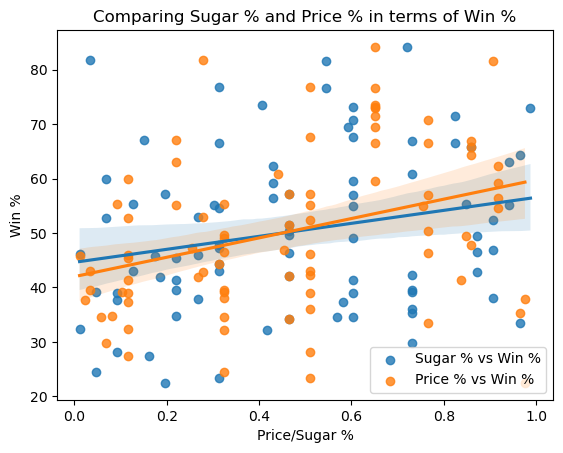

In [9]:
sns.regplot(x = candy["sugarpercent"], y = candy["winpercent"], ci = 95, data = candy, label = "Sugar % vs Win %")
sns.regplot(x = candy["pricepercent"], y = candy["winpercent"], ci = 95, data = candy, label = "Price % vs Win %") 
plt.legend()
plt.xlabel("Price/Sugar %")
plt.ylabel("Win %")
plt.title("Comparing Sugar % and Price % in terms of Win %")
plt.show()

**Inference**: While we cannot be completely confident in our regression lines as the spread of data is rather
drastic, we can infere that in both cases as price, and sugar content increase so does the overall win percentage of our candy. 

Create a barplot

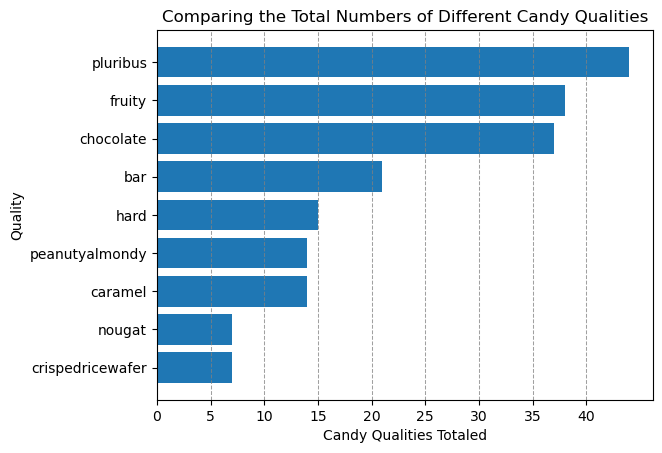

In [10]:
candy_narrowed_qualities = candy.columns.difference(['name', 'winpercent', 'competitorname', 'sugarpercent', 'pricepercent'])
quality_sums = candy[candy_narrowed_qualities].sum().sort_values()
plt.barh(quality_sums.index, quality_sums)
plt.xlabel('Candy Qualities Totaled')
plt.ylabel('Quality')
plt.xticks(np.arange(0, 45, step=5))
plt.title('Comparing the Total Numbers of Different Candy Qualities')
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.75, alpha=0.75)
plt.show()

Make two subsets, 50% of candy above the median of win percent and the 50% of candy below the median. Then plot a horizontal barplot representing the same counts of each quality as above, where black bars represent the less popular candy and orange bars represent the more popular candy. 

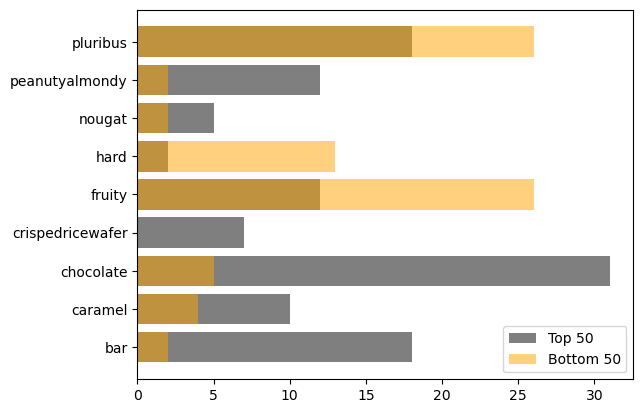

In [11]:
candy_narrowed_qualities = candy.columns.difference(['name', 'winpercent', 'competitorname', 'sugarpercent', 'pricepercent'])
median = np.median(candy["winpercent"])
bottom_50 = candy[candy['winpercent'] < median]
top_50 = candy[candy['winpercent'] > median]
t_sums = top_50[candy_narrowed_qualities].sum()
b_sums = bottom_50[candy_narrowed_qualities].sum()
plt.barh(t_sums.index, t_sums, color = "black", alpha = 0.5, label = "Top 50")
plt.barh(b_sums.index, b_sums, color = "orange", alpha = 0.5, label = "Bottom 50")
plt.legend()
plt.show()

**Inference**: From this paired bar chart, we can see that the top 50 candies typically fall under the category of chocolate, and bar. While the bottom 50 candies typically fall under the category of pluribus and fruity. This is interesting because it tells us that typically chocolatey candies are often enjoyed more than fruity candies. 

The 5 Most Popular Candies and 5 Least Popular

In [12]:
candy = candy.sort_values(by=['winpercent'], ascending = False)
top5 = candy.head(5)
most_popular = pd.Series(top5.name)
most_popular

53    Reeses Peanut Butter cup
52           Reeses Miniatures
79                        Twix
26                     Kit Kat
64                    Snickers
Name: name, dtype: object

In [13]:
bot5 = candy.tail(5)
least_popular = pd.Series(bot5.name) 
least_popular

24            Jawbusters
72          Super Bubble
10              Chiclets
5     Boston Baked Beans
42             Nik L Nip
Name: name, dtype: object

## Section 2

Read in the `Horror Movies IMDB` dataset. This dataset represents a subset of some of the best-know movies in the horror genre released between 1920 and 2023. 

In [14]:
horror = pd.read_csv("Horror Movies IMDB.csv")
horror.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN


Clean the variable.

In [15]:
horror['Gross'] = horror['Gross'].str.replace('$', '').str.replace('M', '')
horror['Gross_clean'] = horror['Gross'].astype(np.number)
horror = horror[horror['Gross_clean'] > 0]
horror = horror.drop('Gross', axis=1)
horror

/var/folders/vb/8z265h0d0gn94dqwgkglhhcr0000gn/T/ipykernel_26397/367478506.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  horror['Gross'] = horror['Gross'].str.replace('$', '').str.replace('M', '')


,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross_clean
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",78.90
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",32.00
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",44.02
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",13.78
5,The Exorcist,1973,122,Horror,8.1,William Friedkin,"4,22,330",232.91
...,...,...,...,...,...,...,...,...
828,Slender Man I,2018,93,"Horror, Mystery, Thriller",3.2,Sylvain White,"36,238",30.57
829,Jaws: The Revenge,1987,89,"Adventure, Horror, Thriller",3.0,Joseph Sargent,"47,708",20.76
830,BloodRayne,2005,95,"Action, Fantasy, Horror",3.0,Uwe Boll,"36,527",2.41
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",5.18


Subset `horror` filtering out NA values in `Gross_clean`. 

Then visualize the distributions of `Gross` and `Rating`. 

In [16]:
horror_sub = horror.dropna(subset = "Gross_clean")

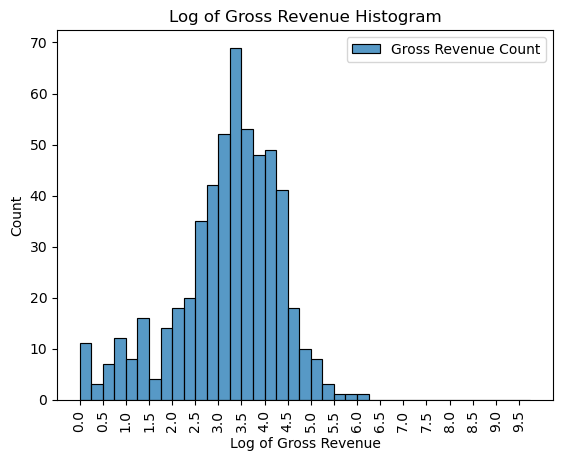

In [17]:
# Distribution 1
bins1 = np.arange(0, 10, step = .25)
logged = (np.log(horror_sub["Gross_clean"]))
sns.histplot(x = logged, data = horror_sub, label = "Gross Revenue Count", bins = bins1)
plt.title("Log of Gross Revenue Histogram")
plt.xlabel("Log of Gross Revenue")
plt.legend()
plt.xticks(np.arange(0, 10, step = .5), rotation = "vertical")
plt.show()

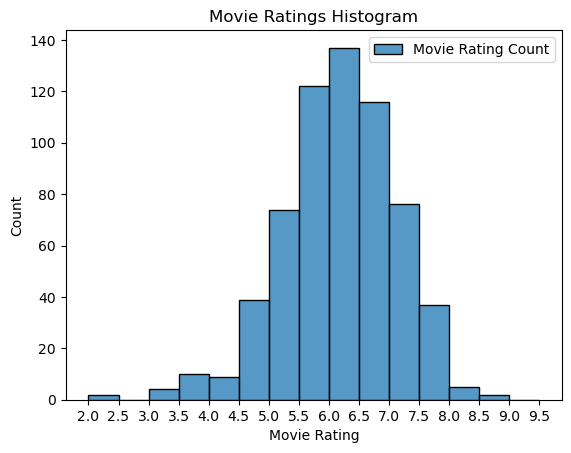

In [18]:
# Distribution 2
bins2 = np.arange(2, 10, step = .5)
sns.histplot(x = 'Rating', data = horror_sub, label = "Movie Rating Count", bins = bins2)
plt.title("Movie Ratings Histogram")
plt.xlabel("Movie Rating")
plt.legend()
plt.xticks(np.arange(2, 10, step = .5))
plt.show()
plt.show()

Plot `Rating` (y) as a function of `Gross_clean` (x) and plot a regression line

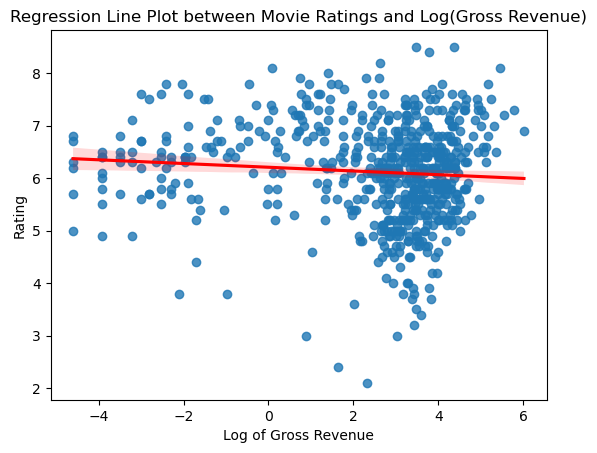

In [19]:
sns.regplot(x = logged, y = "Rating", data = horror_sub, line_kws = {"color" : "red"}, ci = 95)
plt.title("Regression Line Plot between Movie Ratings and Log(Gross Revenue)")
plt.xlabel("Log of Gross Revenue")
plt.show()

**Infernece** This plot above shows us that there is not a strong positive nor negative relationship between rating and gross income, and I believe this to be true because of the fact that rating is a widely sibjective variable and it does not always fall in line with the beliefs of the masses. For example, it woulnd't be surprising for a very niche art film to gain very high ratings from reviewers but struggle to gain the media attention from people to help the film make lots of revenue. 

The 5 most highly rated directors (on average) **among directors with at least 3 movies in the data**?

In [20]:
directors = horror.groupby('Director')
counts = directors['Movie Title'].count()
ratings = directors['Rating'].mean()
movies3 = counts[counts >= 3]
best_directors = ratings[movies3.index].sort_values(ascending=False).head(5)
best_directors

Director
Jordan Peele        7.133333
David Cronenberg    7.116667
Sam Raimi           7.116667
Robert Rodriguez    7.100000
James Wan           6.966667
Name: Rating, dtype: float64

Plot the average movie rating (y) as a function of year ('Moving Year'; x)

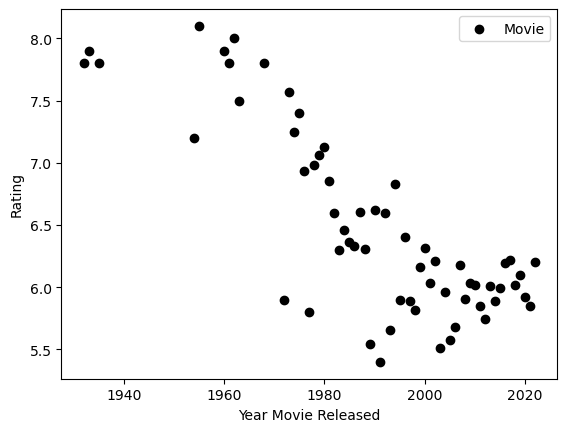

In [21]:
average_ratings = horror.groupby('Movie Year')['Rating'].mean()
ratings = average_ratings.values
years = average_ratings.index
plt.scatter(years, ratings, color = "black", label = "Movie")
plt.xlabel("Year Movie Released")
plt.ylabel("Rating")
plt.legend()
plt.show()

Create three new columns in `horror` called `Primary Genre`, `Secondary Genre` and `Tertiary Genre`

In [22]:
genres = horror['Genre'].str.split(', ', expand=True)
genres.columns = ['Primary Genre', 'Secondary Genre', 'Tertiary Genre']
genres = genres.fillna('None')
horror = pd.concat([horror, genres], axis=1)
horror

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross_clean,Primary Genre,Secondary Genre,Tertiary Genre
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",78.90,Horror,Sci-Fi,None
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",32.00,Horror,Mystery,Thriller
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",44.02,Drama,Horror,None
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",13.78,Horror,Mystery,Sci-Fi
5,The Exorcist,1973,122,Horror,8.1,William Friedkin,"4,22,330",232.91,Horror,None,None
...,...,...,...,...,...,...,...,...,...,...,...
828,Slender Man I,2018,93,"Horror, Mystery, Thriller",3.2,Sylvain White,"36,238",30.57,Horror,Mystery,Thriller
829,Jaws: The Revenge,1987,89,"Adventure, Horror, Thriller",3.0,Joseph Sargent,"47,708",20.76,Adventure,Horror,Thriller
830,BloodRayne,2005,95,"Action, Fantasy, Horror",3.0,Uwe Boll,"36,527",2.41,Action,Fantasy,Horror
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",5.18,Action,Horror,Sci-Fi


Create a new column called Genre_clean that represents either the primary genre of the movie, or the secondary genre if the primary genre of the movie is "Horror"

In [23]:
def get_seperated(row):
    if row['Primary Genre'] != 'Horror':
        return row['Primary Genre']
    else:
        return row['Secondary Genre']

horror['Genre_clean'] = horror.apply(get_seperated, axis=1)
horror

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross_clean,Primary Genre,Secondary Genre,Tertiary Genre,Genre_clean
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",78.90,Horror,Sci-Fi,None,Sci-Fi
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",32.00,Horror,Mystery,Thriller,Mystery
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",44.02,Drama,Horror,None,Drama
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",13.78,Horror,Mystery,Sci-Fi,Mystery
5,The Exorcist,1973,122,Horror,8.1,William Friedkin,"4,22,330",232.91,Horror,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
828,Slender Man I,2018,93,"Horror, Mystery, Thriller",3.2,Sylvain White,"36,238",30.57,Horror,Mystery,Thriller,Mystery
829,Jaws: The Revenge,1987,89,"Adventure, Horror, Thriller",3.0,Joseph Sargent,"47,708",20.76,Adventure,Horror,Thriller,Adventure
830,BloodRayne,2005,95,"Action, Fantasy, Horror",3.0,Uwe Boll,"36,527",2.41,Action,Fantasy,Horror,Action
833,Alone in the Dark,2005,96,"Action, Horror, Sci-Fi",2.4,Uwe Boll,"46,403",5.18,Action,Horror,Sci-Fi,Action


Boxplots showing the ratings for each genre in `Genre_clean`

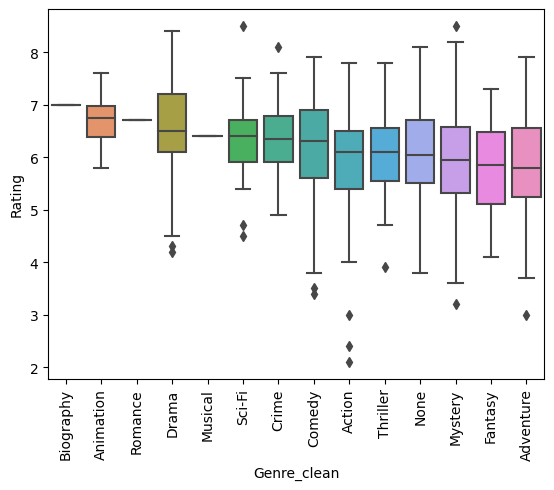

In [24]:
ranks = horror.groupby("Genre_clean")["Rating"].median().sort_values(ascending = False)
ranks = ranks.index
sns.boxplot(x = 'Genre_clean', y = 'Rating', data = horror, order = ranks)
plt.xticks(rotation = "vertical")
plt.show()

## Section 3

Read in the `haunted_places` dataset. This is a comprehensive dataset of all known haunting in the U.S. and associated descriptions. Each record is associated with one haunting. 

In [25]:
hauntings = pd.read_csv("haunted_places.csv")
hauntings.head(50)

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097
5,Albion,United States,A mysterious lady in white has been spotted in...,Riverside Cemetery,Michigan,MI,-84.753056,42.236814,-84.753030,42.243097
6,Algoma Township,United States,On a winding dirt road next to the Rogue River...,Hell's Bridge,Michigan,MI,NaN,NaN,-85.622930,43.149293
7,Algonac,United States,Morrow Road is a Haunted road in Algonac Michi...,Morrow Road,Michigan,MI,-82.576290,42.652997,-82.531018,42.618367
8,Allegan,United States,"People report hearing footsteps, and doors sla...",Elks Lodge,Michigan,MI,-85.841599,42.520552,-85.855303,42.529199
9,Allegan,United States,Various ghostly activities. News coverage abou...,The Grill House and the Rock Bottom Bar,Michigan,MI,-85.857564,42.497762,-85.855303,42.529199


Read in the `state_populations` file and use it (with `haunted_places`)

In [26]:
pop = pd.read_csv("state_populations.csv")
pop.head()

,state,population
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989


State with most hautings

In [27]:
haunts_per = hauntings.groupby('state').size().reset_index(name='haunts')
m = haunts_per.merge(pop, on = "state")
m["per_cap"] = m['haunts']/m['population']
m = m.sort_values("per_cap", ascending = False)
most_haunted = m.iloc[0]["state"]
most_haunted

'Wyoming'

The ratio of hauntings involve a girl versus a boy ($\frac{girl}{boy}$) and the ratio involve a woman versus a man ($\frac{woman}{man}$)

In [28]:
girls = hauntings['description'].str.count("girl")
boys = hauntings['description'].str.count("boy")
boys = boys.sum()
girls = girls.sum()
girl_boy_ratio = girls / boys 
girl_boy_ratio

1.873794916739702

In [29]:
women = hauntings['description'].str.count("women")
women = women.sum()
men = hauntings['description'].str.count("men")
men = men.sum()
woman_man_ratio = women / men 
woman_man_ratio

0.11478454680534918

Percent of hauntings at scary places...

In [30]:
place1 = "College"
place2 = "Hotel"
place3 = "Hospital"
total_US_haunts = len(hauntings)

In [31]:
haunt1 = (hauntings['location'].str.count(place1).sum())/total_US_haunts
haunt2 = (hauntings['location'].str.count(place2).sum())/total_US_haunts
haunt3 = (hauntings['location'].str.count(place3).sum())/total_US_haunts

print(f"{np.round(haunt1, 2)}% of all hauntings occur in {place1}s, {np.round(haunt2, 2)}% of all hauntings occur in {place2}s, and {np.round(haunt3, 2)}% of all hauntings occur in {place3}s")

0.03% of all hauntings occur in Colleges, 0.02% of all hauntings occur in Hotels, and 0.02% of all hauntings occur in Hospitals
